### 결정트리(Decision Tree)
- 직관적이고 쉬운 모델 방식
- 스무고개 퀴즈 형식
- 과적합의 발생으로 다른 모델 대비 성능이 좋지 않은 모델
- 단독으로 사용되는 경우보다 여러개의 DT가 모여서 사용됨 ==> 앙상블

In [5]:
# 모듈 로딩
from sklearn.datasets import load_breast_cancer # 유방암 데이터
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree # 트리 시각화
import matplotlib.pyplot as plt

##### [1] 데이터 로딩

In [6]:
# Numpy ==> DataFrame 형태로 데이터 로딩
# return_X_y=True, as_frame=True
dataX, dataY=load_breast_cancer(return_X_y=True, as_frame=True)

# Bunch 타입 => Key로 data, target, target_names, feature_names... 등 확인
# dataX, dataY=load_breast_cancer()

In [7]:
dataX.info(), dataX.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

(None,
 Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error', 'fractal dimension error',
        'worst radius', 'worst texture', 'worst perimeter', 'worst area',
        'worst smoothness', 'worst compactness', 'worst concavity',
        'worst concave points', 'worst symmetry', 'worst fractal dimension'],
       dtype='object'))

In [8]:
f_names=dataX.columns

In [9]:
dataX.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [10]:
print(type(dataX), type(dataY))
print(type(dataX.values), type(dataY.values))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


##### [2] 학습 & 테스트 데이터 분리

In [11]:
dataX=np.array(dataX)
dataY=np.array(dataY)
# straify = True ==> 라벨 : 타겟데이터 지정 : 학습&데이터에도 비율 맞추기
train_X, test_X, train_y, test_y = train_test_split(dataX, dataY, 
stratify=dataY, random_state=42)

# rain_X, test_X, train_y, test_y = train_test_split(dataX.values, 
# dataY.values, random_state=42)
# 타입 확인하고 두가지 방법 다 가능.

#### [3] 학습

In [12]:
# 학습용 데이터로 학습 진행
dtModel=DecisionTreeClassifier()
dtModel.fit(train_X, train_y)

DecisionTreeClassifier()

##### [4] 평가

In [13]:
train_score=dtModel.score(train_X, train_y)
test_score=dtModel.score(test_X, test_y)
print(train_score, test_score) # overfitting

1.0 0.9090909090909091


##### [5] 시각화

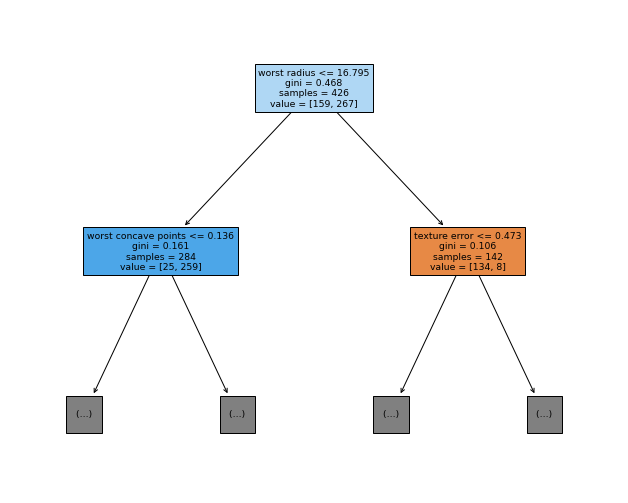

In [14]:
plt.figure(figsize=(11,9))
plot_tree(dtModel, max_depth=1, filled=True, feature_names=f_names)
# plt.savefig('tree.png') # 현재 figure에 있는 그래프 파일로 저장하기
plt.show()

### 모델 속성 확인
- DT에서 속성들 중에서 속성도 중요도를 감지 가능
- Feature별로 특성들의 중요도 값
- 모든 값 합치면 1

In [15]:
dtModel.feature_importances_

array([0.        , 0.00668975, 0.        , 0.        , 0.00752597,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04630969, 0.        , 0.00231135, 0.00238745,
       0.        , 0.        , 0.00752597, 0.        , 0.        ,
       0.69546322, 0.04179055, 0.        , 0.01354675, 0.        ,
       0.00903116, 0.01740312, 0.11684357, 0.03317144, 0.        ])

In [16]:
dtModel.feature_importances_.max()

0.6954632181471274

In [17]:
dtModel.feature_importances_.argmax()
# 최고값의 인덱스 보여줌

20

In [18]:
f_names[20]

'worst radius'

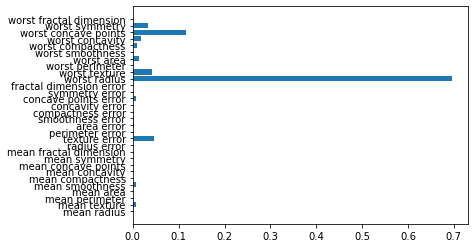

In [19]:
# plt.barh(y=np.arange(forestModel.n_features))
plt.barh(y=f_names, width=dtModel.feature_importances_)
plt.show()

#### RandomForest 학습 모델
- 100개 DecisionTree 모델
- 중복허용된 랜덤샘플 데이터 + DecisionTree 모델

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
forestModel=RandomForestClassifier()

In [22]:
forestModel.fit(train_X, train_y)

RandomForestClassifier()

In [23]:
# 모델 학습 후 속성
print(f'classes_ : {forestModel.classes_}')

classes_ : [0 1]


In [24]:
print(f'base_estimator_ : {forestModel.base_estimator_}')

base_estimator_ : DecisionTreeClassifier()


In [26]:
bestMode=forestModel.base_estimator_

In [27]:
# 평가
forestModel.score(test_X, test_y)

0.958041958041958

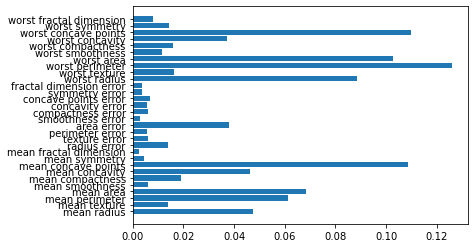

In [28]:
# plt.barh(y=np.arange(forestModel.n_features))
plt.barh(y=f_names, width=forestModel.feature_importances_)
plt.show()